
### Neural Network with activation function relu

### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

### Reading values and performing One Hot encoding

In [ ]:
df = pd.read_csv(r'kc_house_data.csv')
df = df.dropna(axis=0)
#df = pd.get_dummies(df, columns=["ocean_proximity"])
print("Encoded Values are in the format of")
df.head()

Encoded Values are in the format of


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Splitting Data into training 20% and testing 80% along with scaling the data

In [ ]:
X = df.drop("price", axis=1)
X = df.drop("id", axis=1)
X = df.drop("date", axis=1)
y= df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from keras.layers import Dense, BatchNormalization, Dropout

model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam' ,metrics=['accuracy','mean_absolute_error'])
stop = EarlyStopping(monitor='val_loss' ,mode='min', patience=30, restore_best_weights=True)
final= model.fit( X_train, y_train, validation_data=(X_test, y_test),callbacks=[stop], epochs=100, batch_size=20, verbose=1 )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              21000     
                                                                 
 batch_normalization_3 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 batch_normalization_4 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 500)              

In [ ]:
from sklearn.metrics import r2_score
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R2 score on train data:", r2_train)
print("R2 score on test data:", r2_test)

136/136 [==============================] - 0s 3ms/step
R2 score on train data: 0.8035947419009741
R2 score on test data: 0.7985836140778821


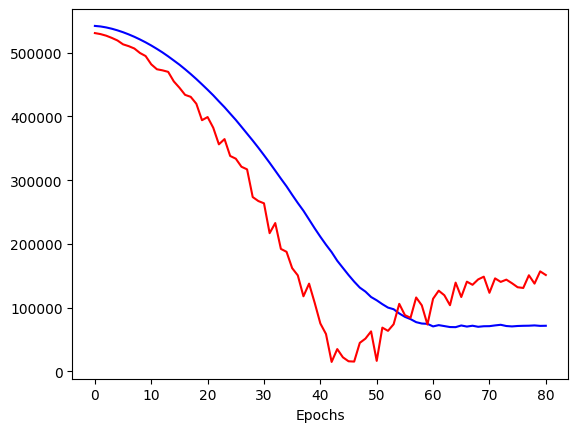

In [ ]:
import matplotlib.pyplot as plt
history=final.history
history

mae = history["mean_absolute_error"]
val_mae = history["val_mean_absolute_error"]


plt.plot(mae, label="mae" ,color="blue")
plt.plot(val_mae, label="val_mae", color="red")
plt.xlabel("Epochs")
plt.show()



136/136 [==============================] - 0s 3ms/step


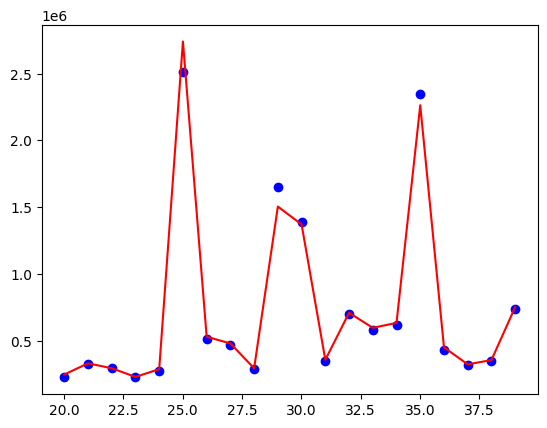

In [ ]:
yTrue= y_test
yPredict = model.predict(X_test)
xAxis= np.linspace(0, len(X_test), len(X_test))
p=20
n=40
plt.plot(xAxis[p:n], yPredict[p:n], color="red")
plt.scatter(xAxis[p:n], yTrue[p:n], color="blue")
plt.show()